# Import Libraries

In [112]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import imageio
import matplotlib.pyplot as plt
import torch
import torchvision

# Utils

In [49]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def fig(*imgs):
    """color mode: 'gray' or None"""
    num_imgs = len(imgs)
    if num_imgs>2:
        _, axs = plt.subplots(num_imgs, 1)
        for i in range(num_imgs):
            axs[i].imshow(imgs[i]);axs[i].set_axis(False)
    else:
        plt.imshow(imgs[0], 'gray');plt.axis(False)    

def load_data(path):
    train_x = sorted(glob(os.path.join(path, "training", "images", "*.tif")))
    train_y = sorted(glob(os.path.join(path, "training", "1st_manual", "*.gif")))

    test_x = sorted(glob(os.path.join(path, "test", "images", "*.tif")))
    test_y = sorted(glob(os.path.join(path, "test", "1st_manual", "*.gif")))

    return (train_x, train_y), (test_x, test_y)

def create_patches(img_path, patch_size=125):
    """it makes an image grid and returns a variable of this image's patches"""

    img = torchvision.io.read_image(img_path)

    C, H, W = img.shape
    n_rows = H // patch_size
    n_cols = W // patch_size

    cropped_img = img[:, :n_rows * patch_size, :n_cols * patch_size]

    patches = torch.empty(C, n_rows, n_cols, patch_size, patch_size)
    for chan in range(C):
        patches[chan, ...] = (
            cropped_img[chan, ...]
            .reshape(n_rows, patch_size, n_cols, patch_size)
            .permute(0, 2, 1, 3)
        )
    return patches


def crop_patches(images, masks, save_path, patch_size, index=0):

    img = torchvision.io.read_image('').permute(1, 2, 0)

    H, W, C = img.shape

    patch_size = 125
    n_rows = H // patch_size
    n_cols = W // patch_size

    cropped_img = img[:n_rows * patch_size, :n_cols * patch_size, :]

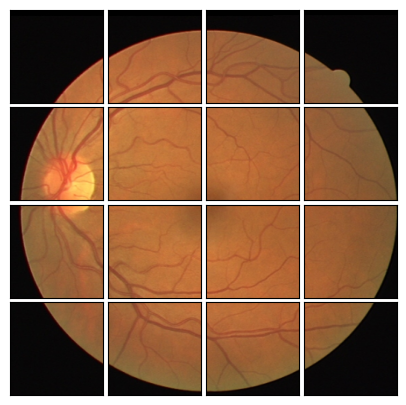

In [108]:
        
#
#Plot
#
f, axs = plt.subplots(n_rows, n_cols, figsize=(5, 5))

for row_idx in range(n_rows):
    for col_idx in range(n_cols):
        axs[row_idx, col_idx].imshow(patches[:, row_idx, col_idx, ...].permute(1,2,0) / 255)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
f.subplots_adjust(wspace=0.05, hspace=0.05)

In [110]:
torchvision.utils.save_image(patches[:,1,1]/255, 'p.png')

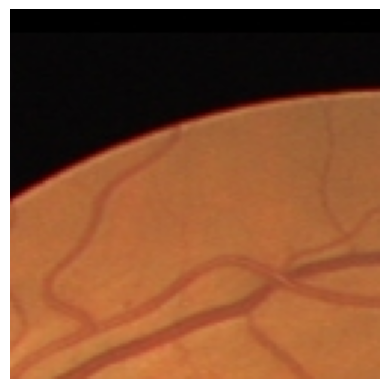

In [86]:
fig(patches[0,1]/255)

In [95]:
torchvision.io.read_image("p.png").shape

torch.Size([3, 125, 125])

In [97]:
patches.shape

torch.Size([4, 4, 125, 125, 3])